#  Models

## Imports 

In [3]:
#Directory Libraries
import sys, os
import glob
from os.path import join
#plotting libraries
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
import seaborn as sns
#pre-processing 
import cv2
from numpy.random import seed
import pandas as pd
from PIL import Image
#tensorflow
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from tensorflow.keras import initializers, layers
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

#parallel computing
from joblib import Parallel, delayed
import argparse
#Ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')
seed(101)
%matplotlib inline
#Make sure that plots are colorblindfriendly
plt.style.use("seaborn-colorblind")
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [1]:
Processed_datasets = {
    'train_dir': 'D:\\Base_directory\\Real\\',
    'val_dir': 'D:\\Base_directory\\Fake\\'
}

In [ ]:
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 25
val_batch_size = 25
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(244,244),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(244,244),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

Found 48000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


In [ ]:
model=Xception(include_top=False,
                 weights='imagenet',
                 input_shape=(299,299,3),pooling ='avg',
                 )
model.summary()


act[0][0]        
__________________________________________________________________________________________________
block5_sepconv1_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv1[0][0]            
__________________________________________________________________________________________________
block5_sepconv2_act (Activation (None, 19, 19, 728)  0           block5_sepconv1_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, 19, 19, 728)  536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 19, 19, 728)  0           block5_sepconv2_bn[0][0]  

In [ ]:
base_model = Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(299, 299, 3),
    include_top=False,pooling ='avg')  # Do not include the ImageNet classifier at the top.

In [ ]:
train_model = models.Model([x, y], [out_caps, decoder(masked_by_y)])
    eval_model = models.Model(x, [out_caps, decoder(masked)])

    # manipulate model
    noise = layers.Input(shape=(n_class, 16))
    noised_digitcaps = layers.Add()([digitcaps, noise])
    masked_noised_y = Mask()([noised_digitcaps, y])
    manipulate_model = models.Model([x, y, noise], decoder(masked_noised_y))
    return train_model, eval_model, manipulate_model
from tensorflow.keras import layers,Model



In [ ]:
base_model.output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 2048) dtype=float32>

In [ ]:
inputs = Input(shape=(299, 299, 3))

from tensorflow.keras.optimizers import Adam
import tensorflow


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

x = base_model.output
predicted = Dense(2,activation ='softmax')(x)
model_pretrain = Model(base_model.input, predicted)
model_pretrain.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
          optimizer=Adam(lr = 0.00),
          metrics=['accuracy'])
pretraining_Xception =model_pretrain.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1)


Epoch 1/20
1372/1372 [==============================] - 242s 177ms/step - loss: 0.1596 - accuracy: 0.9288 - val_loss: 0.1441 - val_accuracy: 0.9271
Epoch 2/20
1372/1372 [==============================] - 248s 181ms/step - loss: 0.1382 - accuracy: 0.9392 - val_loss: 0.1417 - val_accuracy: 0.9306
Epoch 3/20
1372/1372 [==============================] - 247s 180ms/step - loss: 0.1336 - accuracy: 0.9407 - val_loss: 0.1708 - val_accuracy: 0.9213
Epoch 4/20
1372/1372 [==============================] - 247s 180ms/step - loss: 0.1203 - accuracy: 0.9467 - val_loss: 0.1777 - val_accuracy: 0.9175
Epoch 5/20
1372/1372 [==============================] - 248s 181ms/step - loss: 0.1115 - accuracy: 0.9492 - val_loss: 0.4119 - val_accuracy: 0.8615
Epoch 6/20
1372/1372 [==============================] - 247s 180ms/step - loss: 0.1030 - accuracy: 0.9580 - val_loss: 0.1301 - val_accuracy: 0.9446
Epoch 7/20
1372/1372 [==============================] - 250s 182ms/step - loss: 0.0981 - accuracy: 0.9589 - val_

In [ ]:
model_pretrain.save("model_finetuned_xception.hdf5")

In [ ]:
import seaborn as sns
sns.set()

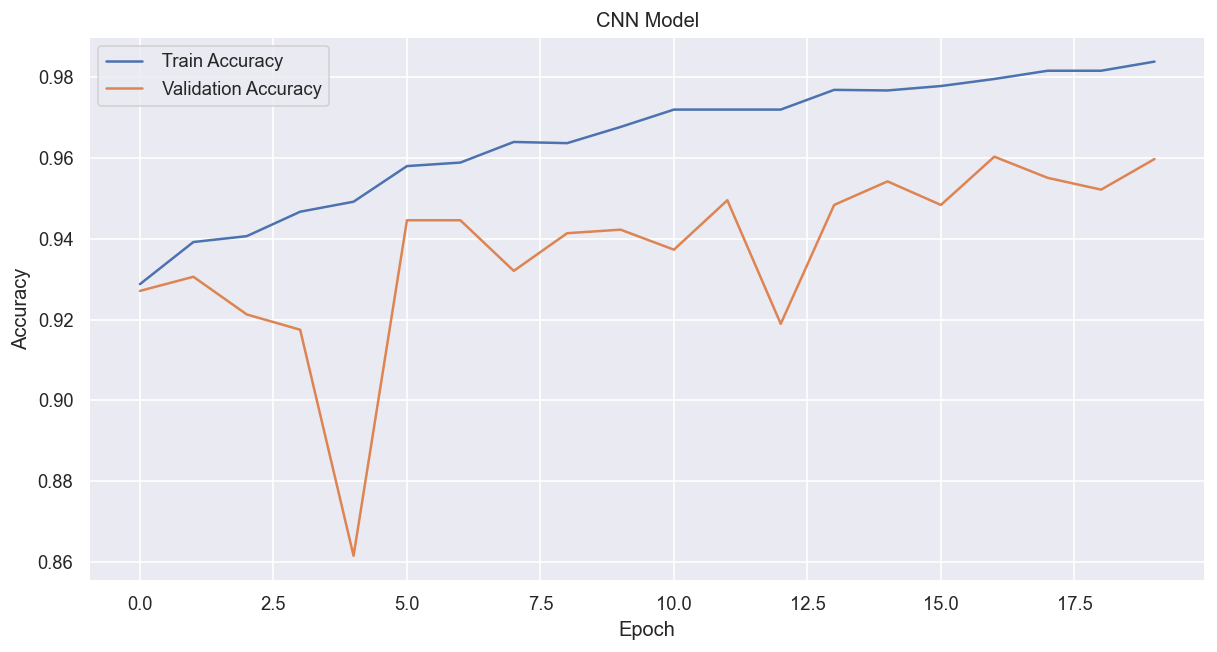

In [ ]:

plt.figure(figsize=(12,6),dpi=120)
plt.plot(pretraining_Xception.history['accuracy'], label=' Train Accuracy')
plt.plot(pretraining_Xception.history['val_accuracy'],label=' Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("CNN Model")
plt.legend()
plt.show()

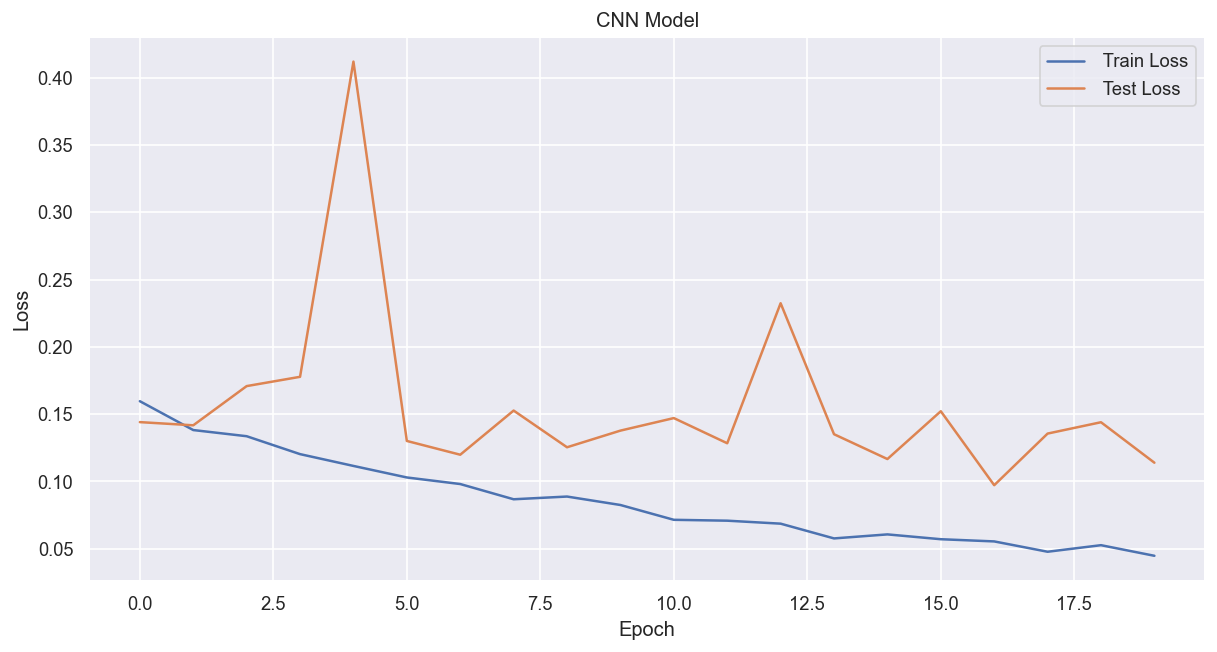

In [ ]:
plt.figure(figsize=(12,6),dpi=120)
plt.plot(pretraining_Xception.history['loss'], label=' Train Loss')
plt.plot(pretraining_Xception.history['val_loss'],label=' Test Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.title("CNN Model")
plt.legend()
plt.show()

In [ ]:
pretraining_Xception.evaluate(,Y_train)

In [1]:
import sys, os
from facenet_pytorch import MTCNN
from PIL import Image
import torch
import glob
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from joblib import Parallel, delayed
import cv2
device = 'cuda' if torch.cuda.is_available() else 'cpu'

ModuleNotFoundError: No module named 'facenet_pytorch'